
## Pandas, data cleaning and Matplotlib


In this assignment, you will be working with two datasets: 

(1) a Uber dataset which contains trip records spanning from 2009 to 2015, including the fare, pick-up time, pick-up and drop-off locations of each trip. (Source: https://www.kaggle.com/yasserh/uber-fares-dataset)

(2) a students' performance dataset on standardized test: https://www.kaggle.com/spscientist/students-performance-in-exams, containing the math, reading and writing scores, gender, parental level of education, etc.

Please read carefully each task you are requested and answer in a single cell containing the tag: ## **Your code here!** ##

In [ ]:
# Here are the imports you will need for starting your notebook.
# It is up to you to import more packages or something else needed to complete a task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uber.csv to uber.csv


## Dataset 1
### Task 1. Preprocessing (4 marks)

First, start by reading the Uber dataset. You wil find the time information is presented in two columns (key and pickup_datetime). Besides, data in the first column (Unnamed:0) will not be helpful to our analytics. Therefore, your first task is to remove the column *'Unnamed:0'* and the column named *'key'*. You can choose between removing these columns in-place or not but your result must be stored in a variable called **'trips'**. At the end of this task, you must print your entire dataframe that will look like the one below.

<img src="images/task1-result.png" width=80% height= auto>


In [ ]:
import io
df = pd.read_csv((io.BytesIO(uploaded['uber.csv'])))
#df.head(5)
#sel2 = sel2.drop(columns=['max_wind_speed'])
trips = df.drop(columns=['Unnamed: 0','key'])

# final print
trips.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


### Task 2. Preprocessing (8 marks)
Format the datetime column "pickup_datetime" and only keep the date (format will be `YY-mm-dd`). For example the "2015-05-07 19:52:06 UTC" and "2015-05-07 19:52:06.0000003" will be formatted to "2015-05-07". 
*Hint:* The data type in the datetime column is a string, you can use the methods `str.strip` to remove the UTC string (source: https://python-reference.readthedocs.io/en/latest/docs/str/strip.html) and `datetime.strptime` (source: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) to help you parsing the string to the format requested. 

Finally, print your dataframe and the result must look like the following.

<img src="images/task2-result.png" width=80% height= auto>

In [ ]:
## **Your code here!** ##
trips['pickup_datetime'] = trips['pickup_datetime'].map(lambda x: x.rstrip('UTC')) 
trips['pickup_datetime'] = pd.to_datetime(trips['pickup_datetime']).dt.date
trips

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20,-73.997124,40.725452,-73.983215,40.695415,1



### Task 3. Preprocessing (3 marks)
Now, sort the dataframe **'trips'** based on the *pickup_datetime* date ascending and print the head with 10 examples.

Your dataframe must look like the following.

<img src="images/task3-result.png" width=80% height= auto>

In [ ]:
## **Your code here!** ##
trips = trips.sort_values(by='pickup_datetime')
trips.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
131365,6.10,2009-01-01,-73.975759,40.749823,-73.982534,40.738737,1
103672,10.10,2009-01-01,-73.982492,40.757212,-73.997370,40.719370,3
131694,9.30,2009-01-01,-73.998807,40.713696,-73.993580,40.752576,1
103200,7.80,2009-01-01,-73.980338,40.766303,-73.975158,40.745811,2
178149,8.50,2009-01-01,-73.972600,40.749377,-73.981393,40.721997,1
100844,8.50,2009-01-01,-73.981918,40.779456,-73.957685,40.771043,2
189252,7.70,2009-01-01,-73.962266,40.779096,-73.975849,40.752208,2
114521,32.65,2009-01-01,-73.872978,40.774098,-73.982055,40.762908,3
133539,4.50,2009-01-01,-73.988440,40.740365,-73.986823,40.730197,1
167185,4.60,2009-01-01,-73.965825,40.754429,-73.972814,40.749124,2


### Task 4. Computation (10 marks)

Calculate distances between the pick-up and drop-off locations. Locations are represented in latitude and longitude and ideally the Haversine distance would give a more accurate result. However, since the location is a reduced area (not the entire planet), we request that you implement the euclidean distance here. Therefore, create a new column named *'distance'* that calculates for each record the euclidean distance between two geolocations (i.e., in our case, pickup and dropoff locations). 

$euclideanDistance(lat1, lon1, lat2, lon2)   = \sqrt {(lat_1-lat_2)^2 + (lon_1-lon_2)^2}$

Finally, you must print the last 10 rows of your dataframe and it must look like the one below. 
<img src="images/task4-result.png" width=80% height= auto>

In [ ]:
## **Your code here!** ##

subLat = trips["pickup_latitude"] - trips["dropoff_latitude"]
subLon = trips["pickup_longitude"] - trips["dropoff_longitude"]
distance1 = ((subLat)**2) + ((subLon)**2) 
distance = (distance1)**(1/2)
trips["distance"] = distance
trips.tail(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
90952,7.00,2015-06-30,-73.964020,40.777203,-73.980034,40.770542,1,0.017344
156937,20.50,2015-06-30,-73.967888,40.792416,-74.003708,40.732464,1,0.069838
126977,75.54,2015-06-30,-73.703262,40.653118,-73.703285,40.653126,1,0.000024
15042,18.50,2015-06-30,-73.991684,40.754646,-73.948006,40.801373,1,0.063962
126707,6.00,2015-06-30,-73.978477,40.783051,-73.970085,40.799614,5,0.018568
185613,11.50,2015-06-30,-73.961136,40.756756,-73.982857,40.771587,1,0.026302
7734,8.50,2015-06-30,-73.955315,40.804562,-73.942322,40.828529,1,0.027263
98187,4.50,2015-06-30,-73.963081,40.766251,-73.969421,40.764351,5,0.006619
75135,9.00,2015-06-30,-74.005302,40.745792,-73.980911,40.730751,1,0.028656
3230,9.50,2015-06-30,-73.982468,40.772266,-73.976784,40.790325,2,0.018932


### Task 5. Selection and Masks (7 marks)

Select all the records in January 2014 and store it in a variable called *'trip_jan14'*. Finally print your dataframe that must look like the one below.

<img src="images/task5-result.png" width=80% height= auto>

In [ ]:
## **Your code here!** ##

start_date = pd.to_datetime("2014-01-01")
end_date = pd.to_datetime("2014-01-31")


after_start_date = trips["pickup_datetime"] >= start_date
before_end_date = trips["pickup_datetime"] <= end_date
between_two_dates = after_start_date & before_end_date
trip_jan14 = trips.loc[between_two_dates]
trip_jan14



/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
127710,8.5,2014-01-01,-73.995383,40.720680,-73.995978,40.736200,2,0.015531
176250,4.0,2014-01-01,-73.981798,40.765092,-73.976987,40.764897,3,0.004815
95544,26.0,2014-01-01,-73.976075,40.759432,-74.007680,40.740772,6,0.036702
80154,22.5,2014-01-01,-73.982268,40.745457,-74.004782,40.706950,1,0.044606
69598,5.5,2014-01-01,-73.970427,40.752365,-73.981125,40.747937,2,0.011578
...,...,...,...,...,...,...,...,...
72249,14.0,2014-01-31,-73.962542,40.772987,-73.977230,40.758917,6,0.020340
37153,8.0,2014-01-31,-73.982534,40.756929,-73.987059,40.760832,1,0.005976
40021,6.0,2014-01-31,-73.982652,40.745070,-73.973608,40.751503,1,0.011099
49353,15.0,2014-01-31,-74.006410,40.743883,-73.987823,40.756271,2,0.022337


### Task 6. Selection and Masks (7 marks)

In this task you **must exclude rows from the variable 'trip_jan14'** that will be considered outliers. The outliers in this task are considered the values below quantile 5% and above quantile 95% for the columns 'distance' and 'fare_amount'. Therefore, you must select all rows that are within the range 5% and 95% of this two columns.

*hint:* Dataframes and series have a function quantile that you can pass as the argument the value you are requesting. (source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html). 

You must create a new dataframe with those values removed named *'trip_outliers'*. Finally, print your dataframe stored in 'trip_filtered' and it must look like the one below. 

<img src="images/task6-result.png" width=80% height= auto>

In [ ]:
## **Your code here!** ##

trip_outliers = ((trip_jan14.fare_amount > trip_jan14.fare_amount.quantile(.05)) & (trip_jan14.fare_amount < trip_jan14.fare_amount.quantile(.95)) & ((trip_jan14.distance > trip_jan14.distance.quantile(.05)) & (trip_jan14.distance < trip_jan14.distance.quantile(.95))))
trip_filtered = trip_jan14[trip_outliers]

# your final print
trip_filtered

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
127710,8.5,2014-01-01,-73.995383,40.720680,-73.995978,40.736200,2,0.015531
95544,26.0,2014-01-01,-73.976075,40.759432,-74.007680,40.740772,6,0.036702
80154,22.5,2014-01-01,-73.982268,40.745457,-74.004782,40.706950,1,0.044606
69598,5.5,2014-01-01,-73.970427,40.752365,-73.981125,40.747937,2,0.011578
11357,17.0,2014-01-01,-73.945873,40.801373,-73.973143,40.743863,1,0.063648
...,...,...,...,...,...,...,...,...
166065,8.5,2014-01-31,-73.967885,40.763388,-73.955567,40.783161,1,0.023296
72249,14.0,2014-01-31,-73.962542,40.772987,-73.977230,40.758917,6,0.020340
37153,8.0,2014-01-31,-73.982534,40.756929,-73.987059,40.760832,1,0.005976
40021,6.0,2014-01-31,-73.982652,40.745070,-73.973608,40.751503,1,0.011099


### Task 7. Data Visualization (plot: 8 marks, answer: 3 marks)

Create two scatter plots for the fare amount in y-axis and trip distances in x-axis using the two dataframes, without the outliers (i.e., stored in variable 'trip_filtered') and with the outliers (i.e., stored in variable 'trip_jan14'). 

What can you observe from the plot below? Why is it important is to exclude the outliers for understanding the data? Could you observe a trend in your plot and what is your observation? 

**A: From the plot below, we can observe that the representation of the relation between those two attribute is different when plotting with and without outliers.It is important to remove outliers to have an accurate representation of the corelation between the attributes that is also what been observed in my plot.**

Your final plot must look like the one below. 

<img src="images/task7-result.png" width=80% height= auto>

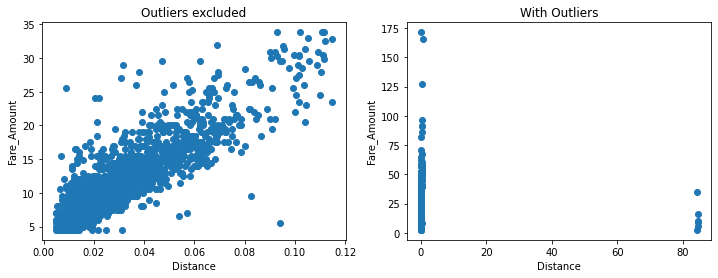

In [ ]:
## **Your code here!** ##

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs=axs.flatten() 

x = trip_filtered["distance"]
y =  trip_filtered["fare_amount"]
x1 = trip_jan14["distance"]
y1 =  trip_jan14["fare_amount"]

axs[0].scatter(x, y)
axs[0].set_title('Outliers excluded')
axs[0].set(xlabel='Distance', ylabel='Fare_Amount')
axs[1].scatter(x1, y1)
axs[1].set_title('With Outliers')
axs[1].set(xlabel='Distance', ylabel='Fare_Amount')

plt.show()

## Dataset 2

### Task 8. Data Aggregation and sorting (8 marks)

Read the dataset of with students' performance ('StudentsPerformance.csv') on a standardized test and store in a variable called 'students'. 

First, calculate the average score for each student using the three grades ('math_score', 'reading_score', 'writing_score') and put the result in a new column named 'avg_score'. 

After sort the dataset based on this 'avg_score' and print your variable 'students'. 

Your final print must look like the one below. 

<img src="images/task8-result.png" width=80% height= auto>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import io
students = pd.read_csv((io.BytesIO(uploaded['StudentsPerformance.csv'])))
#students.head(5)


In [ ]:
## **Your code here!** ##
avg = (students["math_score"]+students["reading_score"]+students["writing_score"])/3
students["avg_score"] = avg
students = students.sort_values(by= 'avg_score')
# your final print
students

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
980,female,group B,high school,free/reduced,none,8,24,23,18.333333
596,male,group B,high school,free/reduced,none,30,24,15,23.000000
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
76,male,group E,some high school,standard,none,30,26,22,26.000000
...,...,...,...,...,...,...,...,...,...
179,female,group D,some high school,standard,completed,97,100,100,99.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000


### Task 9. MultiIndex (8 marks)
In this task you will explore the influence of lunch supplies on students' (exam) test performance using the file 'StudentsPerformance.csv'. Follow the steps and solve the tasks listed below:

First, calculate the average score by groups (A ~ E) and lunch, this operation will produce a multiindex object. Then reset the index to form a new dataframe looks like the one below:
<img src="images/task9-1-result.png" width=30% height= auto>


In [ ]:
## **Your code here!** ##
st = students
mean_df = st.groupby(['race/ethnicity','lunch']).mean() 
mean_df1 = mean_df.reset_index()
students_lunch = mean_df1[["race/ethnicity","lunch","avg_score"]]
# your final print
students_lunch


,race/ethnicity,lunch,avg_score
0,group A,free/reduced,57.657407
1,group A,standard,66.616352
2,group B,free/reduced,60.975845
3,group B,standard,68.030303
4,group C,free/reduced,60.412281
5,group C,standard,70.868293
6,group D,free/reduced,64.666667
7,group D,standard,71.746507
8,group E,free/reduced,67.495935
9,group E,standard,74.929293


### Task 10. Reshape (10 marks)

1.   List item
2.   List item



Reshape the above data for the step 3, make the lunch type ('free/reduced' and 'standard') to be the column names and average scores to be the cell values. The reshaped data will look like:
<img src="images/task9-2-result.png" width=30% height= auto>

*Hint.* The `pivot` function may help you achieve the goal: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html



In [ ]:
## **Your code here!** ##
lunch_df = students_lunch.pivot(index="race/ethnicity", columns="lunch", values="avg_score")

# your final print
lunch_df

lunch,free/reduced,standard
race/ethnicity,,
group A,57.657407,66.616352
group B,60.975845,68.030303
group C,60.412281,70.868293
group D,64.666667,71.746507
group E,67.495935,74.929293


### Task 11. Visualization (10 marks)

Create a horizontal bar chart looks as follows. Please make sure to include the basic elements (title, legend, labels).

**Now answer the following questions. What can you observe from the barchart below? Could you identify a trend or pattern? Please describe it.**

**A: The bar chart illustrates the relation between the average score of different groups of students. We can interpret from the chart that,students exam performance is influenced by the lunch provided. Standard lunch results in increse of average score in comparison to free lunch.

<img src="images/task9-3-result.png" width=60% height= auto>

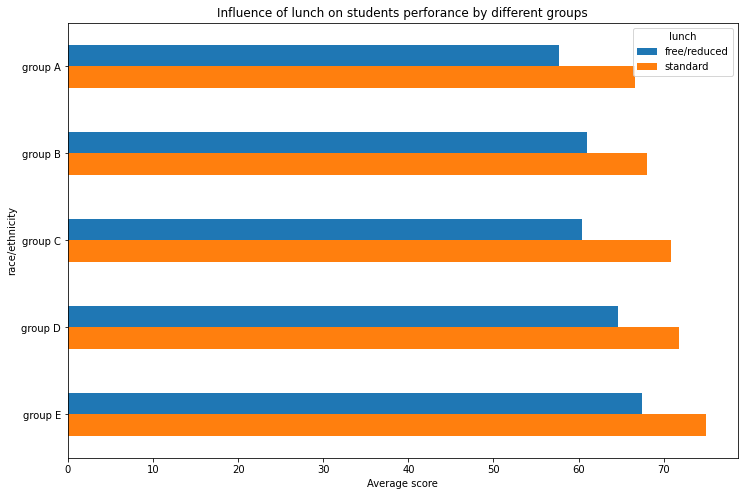

In [ ]:
## **Your code here!** ##
fig, axs = plt.subplots(1, 1, figsize=(12, 8))

axs.set_title('Influence of lunch on students perforance by different groups')
lunch_df[[('free/reduced'), ('standard')]].plot.barh(ax=axs).invert_yaxis()
axs.set(xlabel = 'Average score')
#lunch_df.plot(kind='barh',rot=1)

plt.show()

### Task 12. Visualization (14 marks)

In this task, you will explore the relationship between students' test scores and the education level of their parents. Produce a violinplot looks like the one below.

*Note.* Pandas data framework does not include embedded violinplot, you need to carefully refer to Matplotlib violinplot API and format your data for visualization.

**Now answer the following question. Could you identify a trend or pattern in the boxplot below? Please describe it with your own words.**

**A: In the box plot below, we see that the distribution of the scores of students differes with that of parents education level. For students whose parents have Master's degree cut of a higher lower threshold of arks than that of others. The more the education qualification of parents the higher the distribution of their children's mark starts.

<img src="images/task10-result.png" width=60% height= auto>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


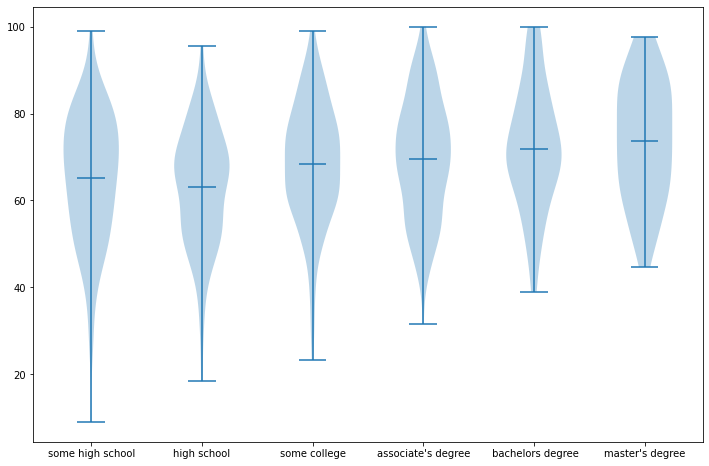

In [ ]:
## **Your code here!** ##
fig, axs = plt.subplots(1, 1, figsize=(12, 8))
 
labels = ["some high school", "high school", "some college", "associate's degree", " bachelors degree", "master's degree"]

axs.violinplot(dataset = [students[students.parental_level_of_education == "some high school"]["avg_score"].values,
                           students[students.parental_level_of_education == "high school"]["avg_score"].values,
                           students[students.parental_level_of_education == "some college"]["avg_score"].values,
                           students[students.parental_level_of_education == "associate's degree"]["avg_score"].values,
                           students[students.parental_level_of_education == "bachelor's degree"]["avg_score"].values,
                           students[students.parental_level_of_education == "master's degree"]["avg_score"].values],showmeans= True,showextrema=True)

# add x-tick labels

axs.xaxis.set_tick_params(direction='out')
axs.xaxis.set_ticks_position('bottom')
axs.set_xticks(np.arange(1, len(labels) + 1))
axs.set_xticklabels(labels)

plt.show()